# Crop_recommendation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Importing

In [2]:
df_raw=pd.read_csv('Crop_recommendation.csv')

In [3]:
df=df_raw.copy()

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

df['label'] = label_enc.fit_transform(df['label'])

In [9]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [10]:
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

## EDA

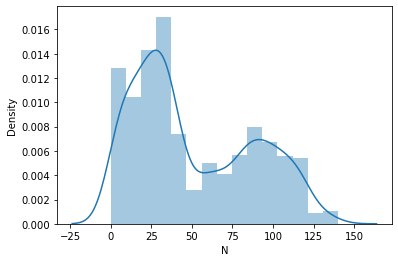

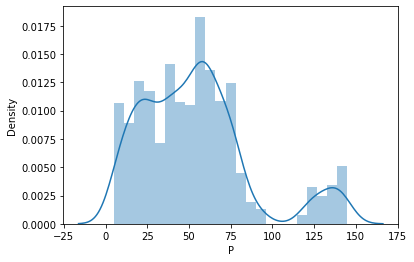

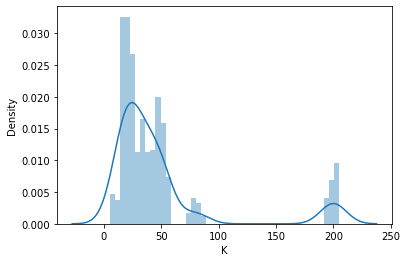

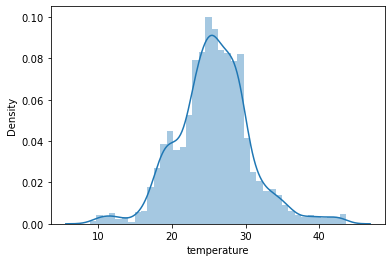

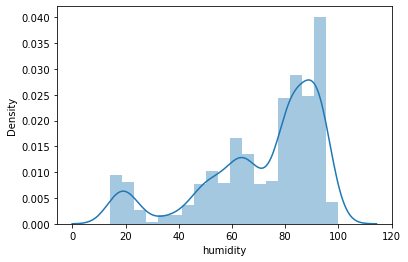

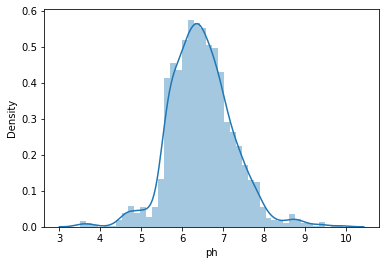

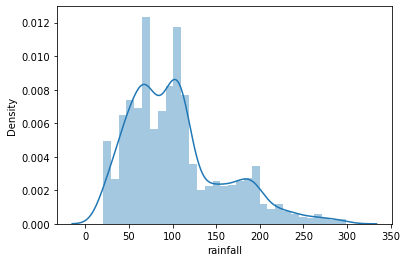

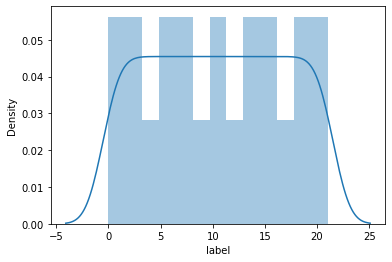

In [11]:
for i in df.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

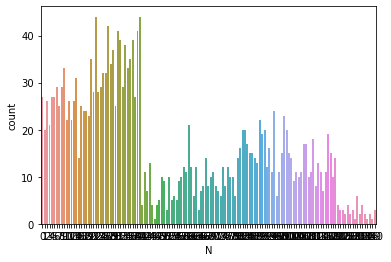

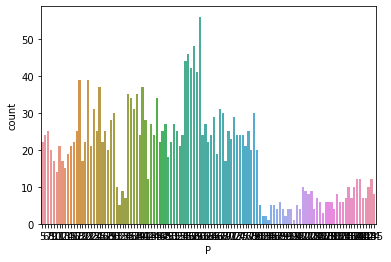

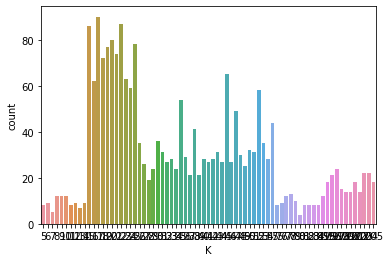

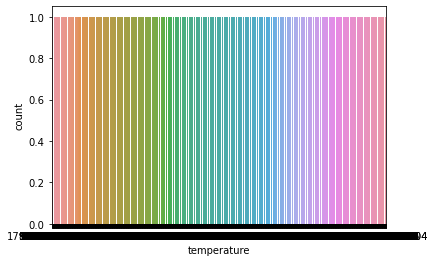

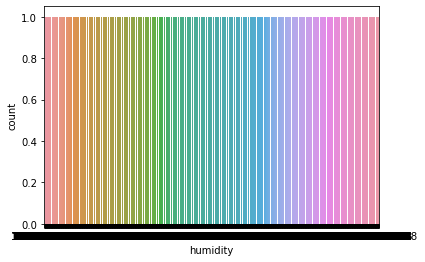

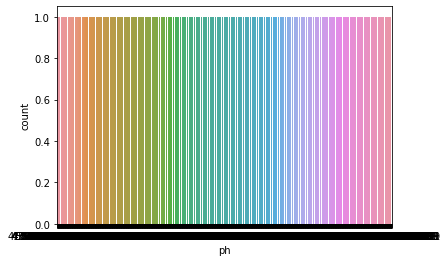

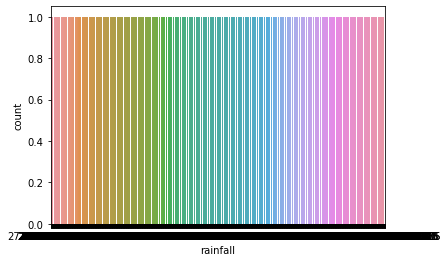

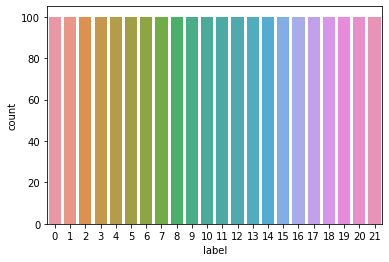

In [12]:
for i in df.columns:
    sns.countplot(df[i])
    plt.show()

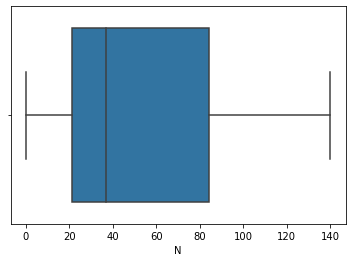

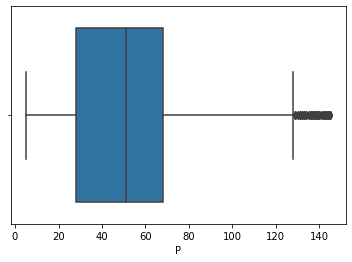

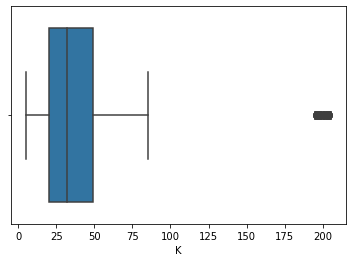

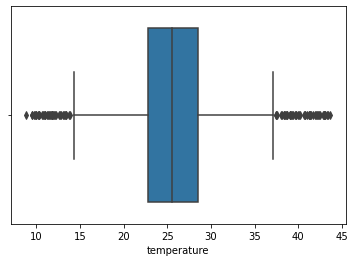

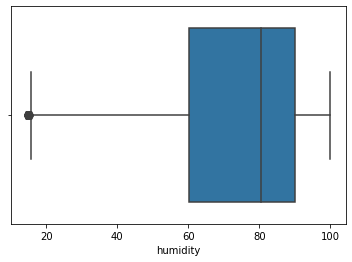

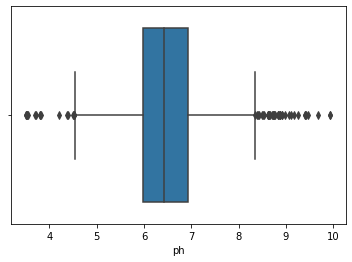

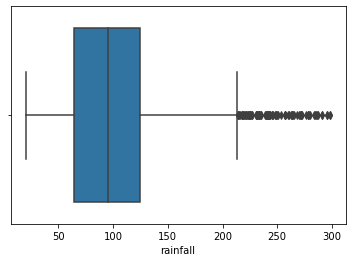

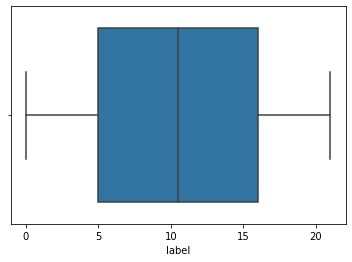

In [13]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

## Split Data

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('label',axis=1)
y=df['label']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standard Scale

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Models

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score

In [22]:
M1=RandomForestClassifier()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('classification Report:',classification_report(y_test,P1))
print('\n')
print('Confusion Matrix:', confusion_matrix(y_test,P1))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P1))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M1.predict_proba(X_test),multi_class='ovr'))

classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
    

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
M2=DecisionTreeClassifier()
M2.fit(X_train,y_train)
P2=M2.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P2))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P2))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P2))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M2.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### Knn

In [25]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

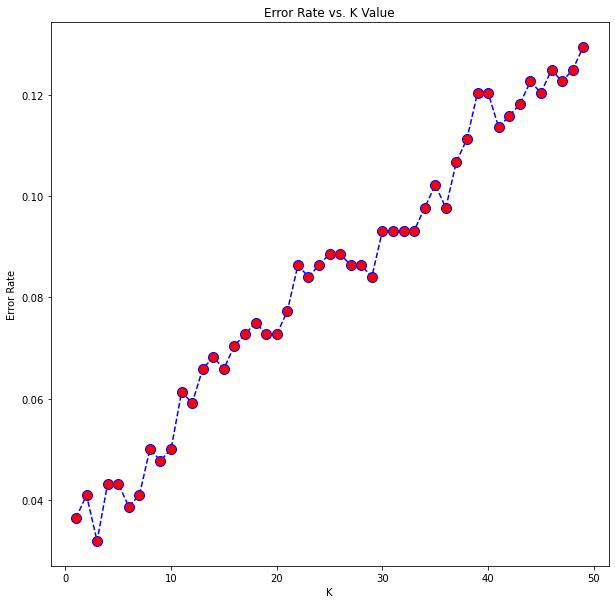

In [26]:
error_Mat=[]
for i in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i=knn.predict(X_test)
    error_Mat.append(np.mean(predict_i != y_test))
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error_Mat,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [28]:
M3=KNeighborsClassifier(n_neighbors=3)
M3.fit(X_train,y_train)
P3=M3.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P3))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P3))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P3))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M3.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.85      0.96      0.90        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       0.90      1.00      0.95        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### NB

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
M4=GaussianNB()
M4.fit(X_train,y_train)
P4=M4.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P4))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P4))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P4))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M4.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### GB Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
M5=GradientBoostingClassifier()
M5.fit(X_train,y_train)
P5=M5.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P5))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P5))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P5))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M5.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### Hist Boosing

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [34]:
M6=HistGradientBoostingClassifier()
M6.fit(X_train,y_train)
P6=M6.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P6))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P6))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P6))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M6.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       0.96      0.96      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### Neural Network

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
M7=MLPClassifier(hidden_layer_sizes=(50,))
M7.fit(X_train,y_train)
P7=M7.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P7))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P7))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P7))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M7.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.83      0.83        23
           9       0.95      0.95      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### XG Boost

In [37]:
from xgboost import XGBClassifier

In [38]:
M8=XGBClassifier()
M8.fit(X_train,y_train)
P8=M8.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P8))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P8))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P8))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M8.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### Cat Boost

In [39]:
from catboost import CatBoostClassifier

In [40]:
M9=CatBoostClassifier()
M9.fit(X_train,y_train)
P9=M9.predict(X_test)

Learning rate set to 0.081441
0:	learn: 2.5060563	total: 228ms	remaining: 3m 47s
1:	learn: 2.1497560	total: 271ms	remaining: 2m 15s
2:	learn: 1.8879731	total: 319ms	remaining: 1m 45s
3:	learn: 1.6899593	total: 366ms	remaining: 1m 31s
4:	learn: 1.5132866	total: 413ms	remaining: 1m 22s
5:	learn: 1.3842046	total: 466ms	remaining: 1m 17s
6:	learn: 1.2586241	total: 513ms	remaining: 1m 12s
7:	learn: 1.1651460	total: 559ms	remaining: 1m 9s
8:	learn: 1.0704173	total: 608ms	remaining: 1m 6s
9:	learn: 0.9925385	total: 659ms	remaining: 1m 5s
10:	learn: 0.9204733	total: 729ms	remaining: 1m 5s
11:	learn: 0.8629064	total: 792ms	remaining: 1m 5s
12:	learn: 0.7993477	total: 849ms	remaining: 1m 4s
13:	learn: 0.7503284	total: 897ms	remaining: 1m 3s
14:	learn: 0.7064553	total: 949ms	remaining: 1m 2s
15:	learn: 0.6650101	total: 1s	remaining: 1m 1s
16:	learn: 0.6260001	total: 1.05s	remaining: 1m
17:	learn: 0.5921954	total: 1.1s	remaining: 60s
18:	learn: 0.5581745	total: 1.15s	remaining: 59.2s
19:	learn: 0.

In [42]:
print('classification Report:','\n',classification_report(y_test,P9))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P9))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P9))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M9.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.85      1.00      0.92        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### Light GBM

In [43]:
from lightgbm import LGBMClassifier

In [44]:
M10=LGBMClassifier()
M10.fit(X_train,y_train)
P10=M10.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P10))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P10))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P10))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M10.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

### Bagging

In [45]:
from sklearn.ensemble import BaggingClassifier

In [46]:
M11=BaggingClassifier(base_estimator=LGBMClassifier())
M11.fit(X_train,y_train)
P11=M11.predict(X_test)
print('classification Report:','\n',classification_report(y_test,P11))
print('\n')
print('Confusion Matrix:','\n',confusion_matrix(y_test,P11))
print('\n')
print('ACCURACY:',accuracy_score(y_test,P11))
print('\n')
print('Roc Value:',roc_auc_score(y_test,M11.predict_proba(X_test),multi_class='ovr'))

classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

## All at one Place

In [47]:
Name=['Random Forest Classifier','Decision Tree','Naive Bayes classifier', 'KNN', 
      'GBBoosting','Histogram Boosting Classifier','XGB Boosting','Light GBM',
      'CAT Boosting','Neural_Network','Bagging_classifier']
clfs= [RandomForestClassifier(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=3),
      GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1),
       HistGradientBoostingClassifier(),XGBClassifier(),LGBMClassifier(),MLPClassifier(),
       CatBoostClassifier(),BaggingClassifier(base_estimator=MLPClassifier())]

In [48]:
results=[]

for i in clfs:
    i.fit(X_train,y_train)
    score=roc_auc_score(y_test,i.predict_proba(X_test),multi_class='ovr')
    results.append(score)
    
Score=pd.DataFrame(data=results,index=Name)
Score.columns=['Accuracy']

Learning rate set to 0.081441
0:	learn: 2.5060563	total: 48.2ms	remaining: 48.2s
1:	learn: 2.1497560	total: 94.5ms	remaining: 47.2s
2:	learn: 1.8879731	total: 140ms	remaining: 46.5s
3:	learn: 1.6899593	total: 191ms	remaining: 47.5s
4:	learn: 1.5132866	total: 259ms	remaining: 51.5s
5:	learn: 1.3842046	total: 318ms	remaining: 52.6s
6:	learn: 1.2586241	total: 377ms	remaining: 53.5s
7:	learn: 1.1651460	total: 430ms	remaining: 53.4s
8:	learn: 1.0704173	total: 478ms	remaining: 52.6s
9:	learn: 0.9925385	total: 529ms	remaining: 52.3s
10:	learn: 0.9204733	total: 576ms	remaining: 51.8s
11:	learn: 0.8629064	total: 628ms	remaining: 51.7s
12:	learn: 0.7993477	total: 682ms	remaining: 51.8s
13:	learn: 0.7503284	total: 738ms	remaining: 52s
14:	learn: 0.7064553	total: 785ms	remaining: 51.5s
15:	learn: 0.6650101	total: 829ms	remaining: 51s
16:	learn: 0.6260001	total: 879ms	remaining: 50.8s
17:	learn: 0.5921954	total: 930ms	remaining: 50.8s
18:	learn: 0.5581745	total: 985ms	remaining: 50.8s
19:	learn: 0.

In [49]:
Score.sort_values(by='Accuracy',ascending=False)

,Accuracy
Naive Bayes classifier,0.999991
Neural_Network,0.999975
Light GBM,0.999961
XGB Boosting,0.999944
Random Forest Classifier,0.999911
Histogram Boosting Classifier,0.999793
CAT Boosting,0.999663
Bagging_classifier,0.999605
Decision Tree,0.994455
KNN,0.989869
